In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
cmap = plt.get_cmap('tab10')
from glob import glob

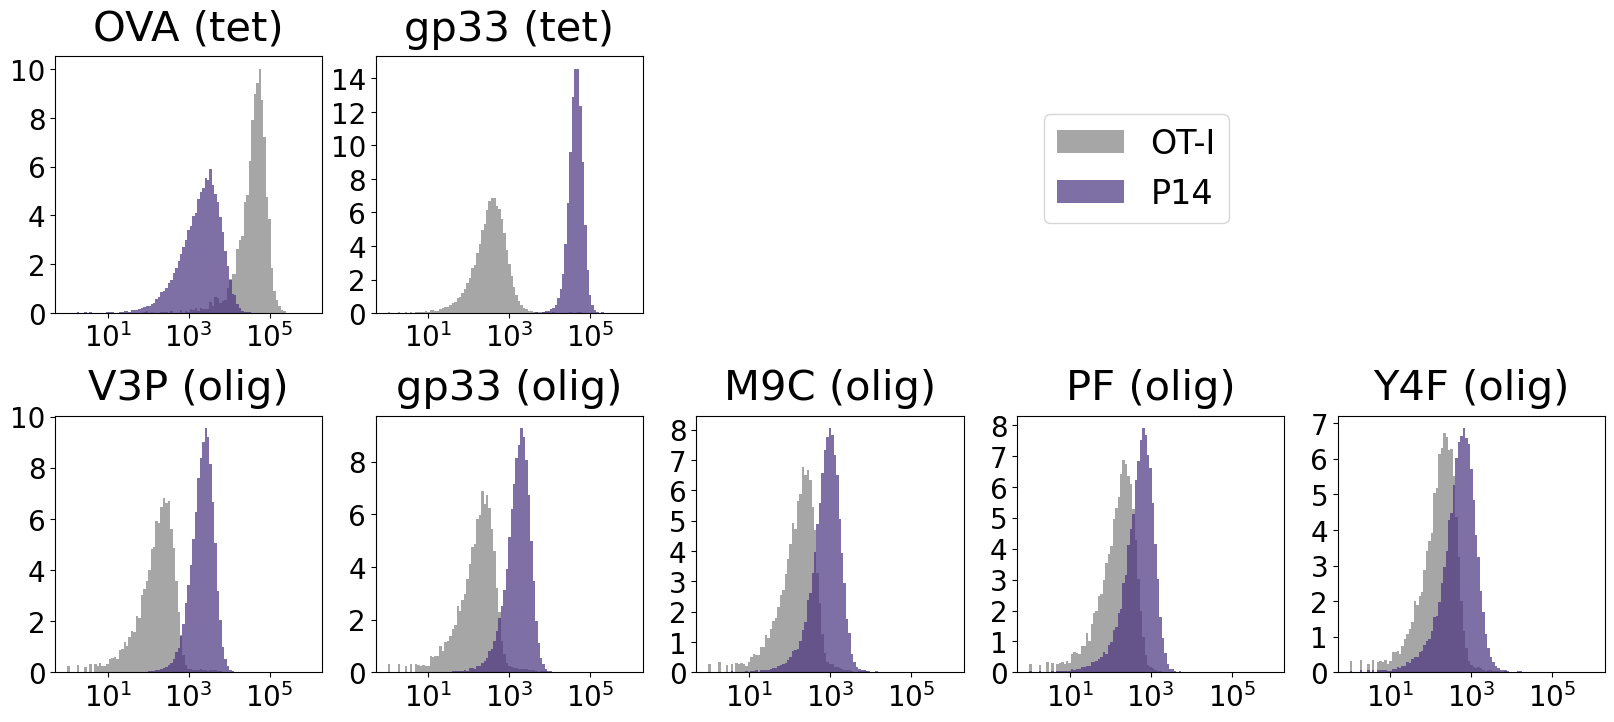

In [80]:
colors = {
    'P14':'#48327F',
    'OT-I':'gray'
}

names = {
    'ova-tet-PE':'OVA (tet)',
    'gp33_tet-APC':'gp33 (tet)',
    'sl119_y4f': 'Y4F (olig)',
    'sl119_v3p': 'V3P (olig)',
    'sl119_wt': 'gp33 (olig)',
    'sl119_m9c': 'M9C (olig)',
    'sl119_pf': 'PF (olig)',
}

rows = {
    'ova-tet-PE':'FGH',
    'gp33_tet-APC':'ABC',
    'sl119_y4f': 'ABC',
    'sl119_v3p': 'ABC',
    'sl119_wt': 'ABC',
    'sl119_m9c': 'ABC',
    'sl119_pf': 'ABC',
}

cols = {
    'ova-tet-PE':1,
    'gp33_tet-APC':2,
    'sl119_y4f': 3,
    'sl119_v3p': 4,
    'sl119_wt': 5,
    'sl119_m9c': 6,
    'sl119_pf': 7,
}

order = [
    'ova-tet-PE',
    'gp33_tet-APC',
    'sl119_v3p',
    'sl119_wt',
    'sl119_m9c',
    'sl119_pf',
    'sl119_y4f',
]

plt.figure(figsize=[20,8])
for n,name in enumerate(order):
    plt.subplot(2,5,n+1+(3*(n>1)))
    for tcr in ['OT-I','P14']:
        data = pd.read_csv(f'../figure6_oligomer-staining/250903_sl119_jurkat_ot1_p14/export_{rows[name][0]}{cols[name]}_{name}_{tcr}.csv')

        if 'PE' in name:
            sns.histplot(data['YL1-A :: PE-PE-A'],bins=np.logspace(0,6,100),label=tcr,
                         color=colors[tcr],alpha=0.7,stat='percent')
        else:
            sns.histplot(data['RL1-A :: APC-APC-A'],bins=np.logspace(0,6,100),label=tcr,
                         color=colors[tcr],alpha=0.7,stat='percent')

    if n==1:
        plt.legend(loc=[2.5,0.35],fontsize=24)
    plt.semilogx()
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(names[name],fontsize=30,y=1.03)
plt.subplots_adjust(hspace=0.4)
plt.savefig('example_histograms.png',dpi=300,bbox_inches='tight')